In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def show_digit(val): #Takes a row from a dataframe and prints out the image
    plt.imshow(val.values.reshape(28, 28), cmap = "gray_r")

In [4]:
def any_na(lists):
    for li in lists:
        if li.columns[X_train.isna().any()].tolist() != []:
            return True
        else:
            return False
    

In [5]:
def get_acc(pred, act):
    acc = sum(pred == act.values)/len(act.values)
    print("Accuracy of " + str(acc))
    return acc

In [6]:
testdf = pd.read_csv("test.csv")
traindf = pd.read_csv("train.csv")

trainLabel = traindf["label"]
traindf = traindf.drop(columns = "label")

In [149]:
testdf.to_csv("sub_test.csv")
traindf.to_csv("sub_train.csv")
trainLabel.to_csv("sub_train_label.csv")

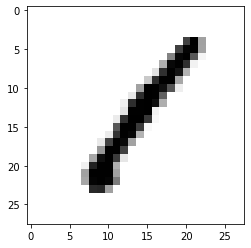

In [7]:
show_digit(traindf.iloc[0])

In [8]:
testdf.shape

(28000, 784)

In [9]:
traindf.shape #We have the train and test df- for the analysis will just focus on the train df for now. 

(42000, 784)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(traindf, trainLabel, test_size = 0.3, random_state = 42)

In [11]:
any_na([X_train, X_test, y_train, y_test])

False

In [12]:
## No missing elements in the testing and the training so we're good

(-1.0, 10.0)

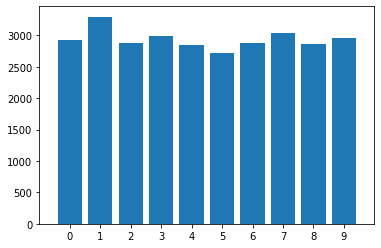

In [13]:
bins = np.arange(11) - 0.5
plt.hist(y_train, bins, rwidth = 0.8)
plt.xticks(range(10))
plt.xlim([-1, 10])

(-1.0, 10.0)

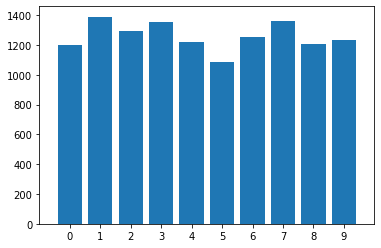

In [14]:
bins = np.arange(11) - 0.5
plt.hist(y_test, bins, rwidth = 0.8)
plt.xticks(range(10))
plt.xlim([-1, 10])

In [15]:
#We don't need to scale the data as all the features are on the same encoding. We could use 1HE on the data, but is not obligatory as sklearn is compatible with multiclass

pca = PCA(n_components = 784)
pC = pca.fit_transform(X_train)

In [16]:
pC.shape

(29400, 784)

In [17]:
sum(pca.explained_variance_**2 > 1)

646

Text(0.5, 1.0, 'Scree Plot')

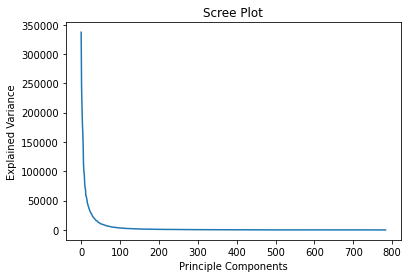

In [18]:
plt.plot(pca.explained_variance_)
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot")

Text(0.5, 1.0, 'Scree Plot - Reduced')

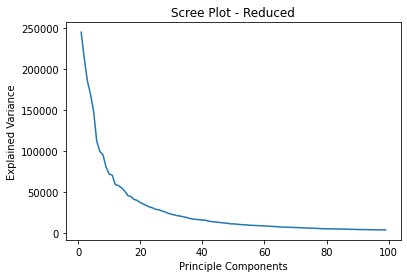

In [19]:
subDom = range(1,100)
plt.plot(subDom, pca.explained_variance_[subDom])
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance")
plt.title("Scree Plot - Reduced")

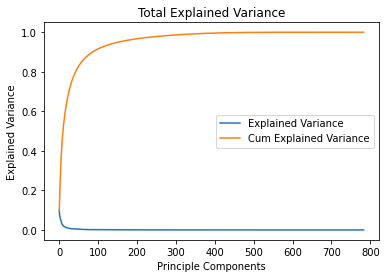

In [20]:
plt.plot(pca.explained_variance_ratio_, label = "Explained Variance")
plt.plot(np.cumsum(pca.explained_variance_ratio_), label = "Cum Explained Variance")
plt.xlabel("Principle Components")
plt.ylabel("Explained Variance")
plt.title("Total Explained Variance")
plt.legend()
plt.show()

In [21]:
no_of_components = 20

In [22]:
pca = PCA(n_components = no_of_components)
pca.fit_transform(X_train)

array([[-670.23027205,  240.02055758, -280.86614787, ...,   98.92930057,
        -116.26942877,  139.07784632],
       [ 320.02588498,  -59.99911984,  108.39838112, ...,  260.14230415,
         -65.8454236 ,   28.30036191],
       [ 462.47971643,  443.43684941, -300.89408642, ...,  -13.46658389,
        -191.47313924,    5.11663234],
       ...,
       [ -38.50740258,  597.22456839,  607.15271136, ..., -194.41068472,
         210.19243608, -201.51063938],
       [ 223.02279182,   25.65218967, -146.3612182 , ...,  367.23399311,
         -66.93720372,  313.84474987],
       [1105.73967354, -250.96708559, -546.63175361, ...,  111.79661176,
         399.31707645,   63.71478641]])

In [23]:
pca.components_.shape

(20, 784)

In [24]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_train

array([[-670.23027154,  240.02055682, -280.86619338, ...,   98.96365683,
        -115.33261883,  139.92623819],
       [ 320.02588489,  -59.99911498,  108.39833618, ...,  260.18208266,
         -67.34975532,   31.14516402],
       [ 462.47971632,  443.43684836, -300.89409746, ...,  -13.28367717,
        -190.6145019 ,    5.43249691],
       ...,
       [ -38.50740282,  597.22456714,  607.15275967, ..., -194.92671733,
         209.41113695, -203.89329713],
       [ 223.02279166,   25.65218258, -146.36119992, ...,  367.434227  ,
         -65.48105888,  312.21182219],
       [1105.73967367, -250.96705779, -546.63184311, ...,  110.08714011,
         394.98592208,   73.85678734]])

In [25]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", algorithm = "auto")

In [26]:
knn.fit(pca_X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(pca_X_test)

In [28]:
acc = sum(y_pred == y_test)/len(y_test)

In [29]:
acc

0.9650793650793651

In [30]:
accVal = []
for k in range(1,6):
    knn = KNeighborsClassifier(n_neighbors = k, weights = "uniform", algorithm = "auto", p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = get_acc(y_pred, y_test)
    accVal.append(acc)

Accuracy of 0.966984126984127
Accuracy of 0.9600793650793651
Accuracy of 0.9665079365079365
Accuracy of 0.9631746031746031
Accuracy of 0.9655555555555555


In [31]:
#p = 1 is the manhatten distance whereas p = 2 is the euclidean. No major change between the two except manhatten increases computational time. 

In [34]:
optimalP = 2
optimalN = 1
optimalKNN = KNeighborsClassifier(n_neighbors = optimalN, weights = "distance", algorithm = "auto", p = optimalP)

In [35]:
optimalKNN.fit(pca_X_train, y_train)
final_y_pred = optimalKNN.predict(pca_X_test)
final_y_pred

array([8, 1, 9, ..., 5, 5, 0])

In [80]:
def calc_roc(pred_class, act_class): #This takes in a single col
    fpr, tpr, thresh = roc_curve(pred_class, act_class)
    return fpr, tpr

In [114]:
#TODO - OHE with the KNN to check ROC curve 
def gen_roc(y_train, pca_X_train, pca_X_test, y_test):
    y_train = pd.get_dummies(y_train)
    y_test = pd.get_dummies(y_test)
    roc_KNN = KNeighborsClassifier(n_neighbors = optimalN, weights = "distance", algorithm = "auto", p = optimalP)
    roc_KNN.fit(pca_X_train, y_train)
    roc_pred = roc_KNN.predict(pca_X_test)
    
    all_fpr = []
    all_tpr = []
    all_auc = []
    
    for i in range(0, 10):
        fpr, tpr = calc_roc(roc_pred[:, i], y_test[i])
        all_fpr.append(fpr)
        all_tpr.append(tpr)
        all_auc.append(auc(fpr, tpr))
    
    
    for i in range(0, 10):
        plt.plot(all_fpr[i], all_tpr[i])
    plt.plot([1, 0], [1, 0], "b--")
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title("Plotting ROC Curve")
    plt.show()   
    
    return all_fpr, all_tpr, all_auc

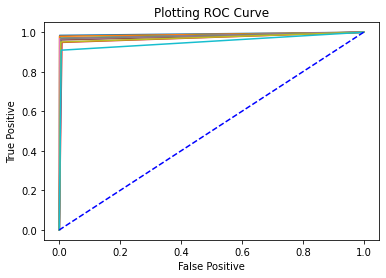

In [117]:
all_fpr, all_tpr, all_auc = gen_roc(y_train, pca_X_train, pca_X_test, y_test)

Text(0, 0.5, 'AUC')

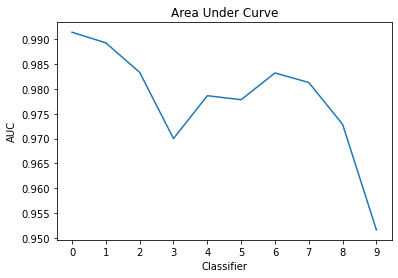

In [126]:
plt.plot(all_auc)
plt.xticks(range(0, 10))
plt.title("Area Under Curve")
plt.xlabel("Classifier")
plt.ylabel("AUC")

In [ ]:
##NN is best at classifying 0 and is worst at classifying a 9. 

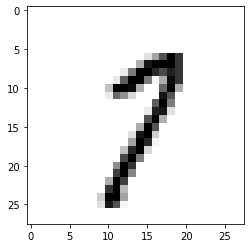

In [130]:
show_digit(X_test.iloc[5457])

In [131]:
from scipy.ndimage.interpolation import shift

In [132]:
A = X_test.iloc[5457]

In [133]:
A

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 20091, Length: 784, dtype: int64

In [136]:
A = np.array(A).reshape((28, 28))
A

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [141]:
s_A = shift(A, [10,10], cval = 0, mode = "constant")
s_A = s_A.reshape([-1])

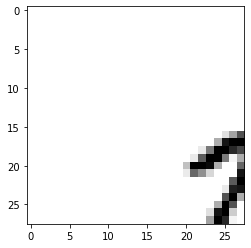

In [145]:
show_digit(pd.Series(s_A))